# **Introduction:**

**Compression:** is the process of compacting data into a smaller number of bits.
<br> <br>**Video Compression (Video Coding):** is the process of compacting or condensing a digital video sequence
into a smaller number of bits.
<br> <br>**Compression is done through two urgent steps:**


*  **Encoder (Compressor):** Converts the original source data into a compressed form prior to transmission or storage.
*   **Decoder (Decompressor):** Converts the compressed form back into a representation of the original data.



The Algorithms of **Data Compression** is achieved by removing redundancy; which are the components not neccessary for the successful reproduction of data.
<br> <br>The Data compressed using **The Lossless Compression** gives a perfect copy of the original data as an output of the decoder. 
<br> <br> **Lossless Compression** of the data gives only a moderate amount of compression, and The best compression ratio achieved with is around 3–4 times.
<br> <br>  To achieve a higher compression, **Lossy Compression** is necessary!
<br><BR> In a **Lossy Compression** system, the decompressed data is not identical to the source data, as it's based on the principle of removing
subjective redundancy, elements of the image or video sequence that can be removed without significantly affecting the viewer’s perception of visual quality.

# **Imports & Installations**



In [ ]:
from google.colab import drive
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from skimage.transform import resize
from IPython.display import HTML
import cv2 as cv
from google.colab.patches import cv2_imshow
import sys 
from google.colab.patches import cv2_imshow
from numpy.core.fromnumeric import reshape
from PIL import Image
from numpy import asarray
from typing_extensions import final
from numpy.core.fromnumeric import reshape
from PIL import Image
import math 

In [ ]:
pip install imageio-ffmpeg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Mounting Google Drive to get the original Video**
xylophone.mp4

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
OriginalVideo = imageio.mimread('/content/drive/MyDrive/InfoProject/xylophone.mp4')  #Loading video

In [ ]:
np.array(OriginalVideo).shape #RGB Video

(141, 240, 320, 3)

# **Converting the RGB Video to  gray scale video.**

The function converting the video from RGB to gaey scale.

In [ ]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,:,0], rgb[:,:,:,1], rgb[:,:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray
# We did this function if we needed it to convert the RGB Image to greyscale one.

Calling this function

In [ ]:
OriginalVideo_Array = np.array(OriginalVideo) #To be fit with the RGB Function (Deals with only Numpy array)
GrayVideo = rgb2gray(OriginalVideo_Array) #Calling the function
np.array(GrayVideo).shape #The 3 dimentions of RGB is removed now!

(141, 240, 320)

**Showing any frame image from the GrayScale video:**

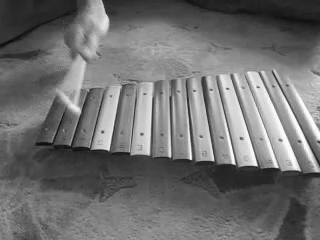

In [ ]:
FrameIndex = 10;
image= GrayVideo[FrameIndex,:,:]
cv2_imshow(image);

# **Displaying the video**


This function is implemented to display any video during the whole project

In [ ]:
def display_video(video):
    fig = plt.figure(figsize=(3,3))  #Display size specification

    mov = []
    for i in range(len(video)):  #Append videos one by one to mov
        img = plt.imshow(video[i] , animated=True)
        plt.axis('off')
        mov.append([img])

    #Animation creation
    anime = animation.ArtistAnimation(fig, mov, interval=50, repeat_delay=1000)

    plt.close()
    return anime

Displaying the original RGB video:

In [ ]:
HTML(display_video(OriginalVideo_Array).to_html5_video())  #Inline video display in HTML5

Displaying the Grey Scale video:

In [ ]:
HTML(display_video(GrayVideo).to_html5_video())  #Inline video display in HTML5

# **The JPEG Encoder & Decoder:**


## **1) Specify the I and P frames in your video**

In [ ]:
I = 10; #I Frames
P = 10; #P Frames
Rows = GrayVideo.shape[1]; #Number of Rows in the gray scale Video
Cols = GrayVideo.shape[2];  #Number of Columns in the gray scale Video
Iframes = np.zeros([I*Rows,Cols]) #Array of the I Frames
Pframes = np.zeros([I*Rows,Cols]); #Array of the P Frames
#Assigning Different Frames into the Array of I Frames
for i in range(I):
  Iframes[i*Rows:i*Rows+Rows,:] = GrayVideo[i,:,:];

#Assigning Different Frames into the Array of P Frames
for i in range(P):
  Pframes[i*Rows:i*Rows+Rows,:] = GrayVideo[i+10,:,:];

**Showing any frame image from the Original RGB Video:**




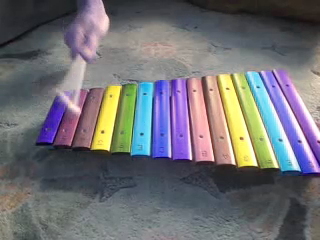

In [ ]:
FrameIndex = 10;
image= OriginalVideo_Array[FrameIndex,:,:,:]
cv2_imshow(image);

**Showing any frame image from the Original GrayScale Video:**




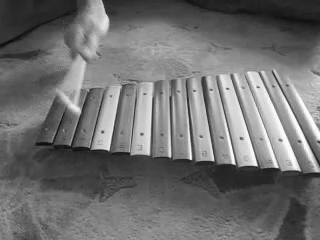

In [ ]:
FrameIndex = 10;
image= GrayVideo[FrameIndex,:,:]
cv2_imshow(image);

**Collecting a number of frames back to construct a video:**

In [ ]:
IframesVideo = np.zeros([I,Rows,Cols])
for i in range(I):
   IframesVideo[i,:,:] = Iframes[i*Rows:i*Rows+Rows,:];
IframesVideo.shape

(10, 240, 320)

In [ ]:
HTML(display_video(IframesVideo).to_html5_video())  #Inline video display in HTML5

## **2) Implemention of JPEG Encoder & Decoder of the I-frames.**

### **Zigzag Function:**
 The function converting the 8 x 8 Block into 1 x 64 Vector, and its inverse.

In [ ]:
def Zigzag(matrix,r,c):
  solution=[[] for i in range(r+c-1)]
  get=[]
  for i in range(r):
      for j in range(c):
          sum=i+j
          if(sum%2 ==0):
  
              #add at beginning
              solution[sum].insert(0,matrix[i][j])
          else:
  
              #add at end of the list
              solution[sum].append(matrix[i][j])
  for i in solution:
    for j in i:
        
        get.append(j)
  return get  

In [ ]:
def Inv_zigzag(array):
  #Mariam Seadway helped me in logic, as i was have a logic error in mine, as it crash with duplicated element in list
  length = len(array)
  size = int(math.sqrt(length))
  needed_array1 = np.concatenate([[i for i in range(1,size)],[i for i in range(size,0,-1)]]) #(1,2,3,4,5,6,7,8,7,6,5,4,3,2,1)
  needed_array2 = np.array([sum(needed_array1[0:i]) for i in range(1,needed_array1.size)])   #(1,3,6,...)
  temp_matrix = np.split(array,needed_array2) #from 1D to 2D
  matrix = np.zeros([size,size],dtype=int)
  for i in range(size):
        for j in range(size):
            matrix[i,j] = temp_matrix[i+j][-1-i+max(0,i+j-size+1) if (i+j)%2==0 else i-max(0,i+j-size+1)]
  return matrix

### **DCT Functions:**
Discrete Cosine Transform Function and its inverse.

In [ ]:
def Block8_DCT(block_8):
  basis = np.zeros((8,8)); #Allocating the basis function
  dct_result = np.zeros((8,8)); #Allocating the result
  for u in range(8): 
    for v in range(8):
      for x in range(8):
        for y in range(8):
          basis [x,y] = (math.cos((1/16)*((2*x)+1)*u*math.pi))*(math.cos((1/16)*((2*y)+1)*v*math.pi)); #Calculating the basis function

      dct_result [u,v]=np.sum(np.multiply(block_8,basis)); 
  dct_result [0,0] = (1/64)*dct_result[0,0];             #The first value in the block /64
  dct_result [0,1:8]=(1/32)*dct_result[0,1:8];         #The first row /32
  dct_result [1:8,0] = (1/32)*dct_result [1:8,0];         #The first column /32
  dct_result [1:8,1:8] = (1/16)*dct_result [1:8,1:8];     # the rest of the block/16
  return dct_result

In [ ]:
def Block8_IDCT(block_8):
  basis = np.zeros((8,8)); #Allocating the basis function
  idct_result = np.zeros((8,8)); #Allocating the result
  for u in range(8):
    for v in range(8):
      for x in range(8):
        for y in range(8):
          basis [x,y] = (math.cos((1/16)*((2*x)+1)*u*math.pi))*(math.cos((1/16)*((2*y)+1)*v*math.pi)); #Calculating the basis function
      idct_result = idct_result + np.dot ( block_8[u,v] , basis );
  return idct_result

###  **Quantization Table**

**The variable X represents which quantization table used**
<br> 1: For **Low Compression.**
<br> 2: For **High Compression**

In [ ]:
def QuantizationTable(X):
  if X == 1:
    return np.array([[1, 1, 1, 1, 1, 2, 2, 4],
                      [1, 1, 1, 1, 1, 2, 2, 4],
                      [1, 1, 1, 1, 2, 2, 2, 4],
                      [1, 1, 1, 1, 2, 2, 4, 8],
                      [1, 1, 2, 2, 2, 2, 4, 8,],
                      [2, 2, 2, 2, 2, 4, 8, 8],
                      [2, 2, 2, 4, 4, 8, 8, 16],
                      [4, 4, 4, 4, 8, 8, 16, 16]]);
  elif X == 2:
    return np.array([[1, 2, 4, 8, 16, 32, 64, 128],
                         [2, 4, 4, 8, 16, 32, 64, 128],
                         [4, 4, 8, 16, 32, 64, 128, 128],
                         [8, 8, 16, 32, 64, 128, 128, 256],
                         [16, 16, 32, 64, 128, 128, 256, 256],
                         [32, 32, 64, 128, 128, 256, 256, 256],
                         [64, 64, 128, 128, 256, 256, 256, 256],
                         [128, 128, 128, 256, 256, 256, 256, 256]]);

### **Run-Length Functions**
The final function which compresses the code

In [ ]:
from numpy.core.numeric import outer
from itertools import groupby
# RLE loop on a list and return list of lists, each list contain the number of repetetion and the symbol
def run_length_encoder(s_list):
    return [[len(list(group)), key] for key, group in groupby(s_list)]

# RLD loop on a list of encoded RLE; take number of itirations 'i' and 'd' ith times

def run_length_decoder(alist):
  out_list=[]

  for i in range(0, len(alist),2 ):
    for d in range(int(alist[i])):
      out_list.append(alist[i+1])
  return out_list

### **Huffman**
The entroby encoding Algorithm, and its inverse.

In [ ]:
# Node of a Huffman Tree  
class Nodes:  
    def __init__(self, probability, symbol, left = None, right = None):  
        # probability of the symbol  
        self.probability = probability  
  
        # the symbol  
        self.symbol = symbol  
  
        # the left node  
        self.left = left  
  
        # the right node  
        self.right = right  
  
        # the tree direction (0 or 1)  
        self.code = ''  
  
""" A supporting function in order to calculate the probabilities of symbols in specified data """  
def CalculateProbability(the_data):  
    the_symbols = dict()  
    for item in the_data:  
        if the_symbols.get(item) == None:  
            the_symbols[item] = 1  
        else:   
            the_symbols[item] += 1       
    return the_symbols  
  
""" A supporting function in order to print the codes of symbols by travelling a Huffman Tree """  
the_codes = dict()  
  
def CalculateCodes(node, value = ''):  
    # a huffman code for current node  
    newValue = value + str(node.code)  
  
    if(node.left):  
        CalculateCodes(node.left, newValue)  
    if(node.right):  
        CalculateCodes(node.right, newValue)  
  
    if(not node.left and not node.right):  
        the_codes[node.symbol] = newValue  
           
    return the_codes  
  
""" A supporting function in order to get the encoded result """  
def OutputEncoded(the_data, coding):  
    encodingOutput = []  
    for element in the_data:  
        encodingOutput.append(coding[element])  
          
    the_string = ''.join([str(item) for item in encodingOutput])      
    return the_string  
          
""" A supporting function in order to calculate the space difference between compressed and non compressed data"""      
def TotalGain(the_data, coding):  
    # total bit space to store the data before compression  
    beforeCompression = len(the_data) * 8  
    afterCompression = 0  
    the_symbols = coding.keys()  
    for symbol in the_symbols:  
        the_count = the_data.count(symbol)  
        # calculating how many bit is required for that symbol in total  
        afterCompression += the_count * len(coding[symbol])    
  
def HuffmanEncoding(the_data):  
    symbolWithProbs = CalculateProbability(the_data)  
    the_symbols = symbolWithProbs.keys()  
    the_probabilities = symbolWithProbs.values()  
      
    the_nodes = []  
      
    # converting symbols and probabilities into huffman tree nodes  
    for symbol in the_symbols:  
        the_nodes.append(Nodes(symbolWithProbs.get(symbol), symbol))  
      
    while len(the_nodes) > 1:  
        # sorting all the nodes in ascending order based on their probability  
        the_nodes = sorted(the_nodes, key = lambda x: x.probability)  
      
        # picking two smallest nodes  
        right = the_nodes[0]  
        left = the_nodes[1]  
      
        left.code = 0  
        right.code = 1  
      
        # combining the 2 smallest nodes to create new node  
        newNode = Nodes(left.probability + right.probability, left.symbol + right.symbol, left, right)  
      
        the_nodes.remove(left)  
        the_nodes.remove(right)  
        the_nodes.append(newNode)  
              
    huffmanEncoding = CalculateCodes(the_nodes[0])  
    TotalGain(the_data, huffmanEncoding)  
    encodedOutput = OutputEncoded(the_data,huffmanEncoding)  
    return encodedOutput, the_nodes[0]  
   
def HuffmanDecoding(encodedData, huffmanTree):  
    treeHead = huffmanTree  
    decodedOutput = []  
    for x in encodedData:  
        if x == '1':  
            huffmanTree = huffmanTree.right     
        elif x == '0':  
            huffmanTree = huffmanTree.left  
        try:  
            if huffmanTree.left.symbol == None and huffmanTree.right.symbol == None:  
                pass  
        except AttributeError:  
            decodedOutput.append(huffmanTree.symbol)  
            huffmanTree = treeHead  
          
    string = [(item) for item in decodedOutput]
    return (string)  

### **Encoding and Decoding The Video Code Using the Low Compression:**

In [ ]:
DecodedFrames =  np.zeros([I,Rows,Cols]); #Preparing one array for all decoded frames
n_Bits_after_encoding1 =  0;

for Counter in range(I):

  IMAGE = Iframes[Counter*Rows:Counter*Rows+Rows,:] #Getting the Image (Video Frame)
  # summarize image details

  DecodedImage = np.zeros((Rows, Cols), dtype=np.uint8); #Preparing the decoded image

  #Get into each loop to encode and decode each frame
  for i in range(0,Rows,8):
    for u in range(0,Cols,8):
      Block8 = IMAGE[i:i+8,u:u+8] # Dividing each image frame into blocks 8*8 pixels 
      BlockDCT = Block8_DCT(Block8) # Performing DCT on each block                   
      QuantizedBlock_ = np.divide(BlockDCT, QuantizationTable(1)) #Performing the quantization step per 8x8 block using a quantization table 1

      QuantizedBlock = QuantizedBlock_.round() #Rounding the Quantized Block

      OneDBlock = Zigzag(QuantizedBlock,8,8)      # Converting the 2-D Block into 1-D vector using the Zigzag Function                  

      RunLengthCode = run_length_encoder((OneDBlock))      # Using Run Length coding                                          
      
      # 6- Huffman function
      FinalList = [item for sublist in RunLengthCode for item in sublist] #############Getting all lists (List of run length code for each block) in on list

      FinalEncodingCode, the_tree = HuffmanEncoding(FinalList);

      n_Bits_after_encoding1 = n_Bits_after_encoding1 + len(FinalEncodingCode); # To calculate the compression ratio.
      #####################################################################################################################################################################################################
      # DEcoder
      Decoding_Code =HuffmanDecoding(FinalEncodingCode, the_tree)      #  Huffman decoder function

      DecodedRunLengthCode = run_length_decoder((Decoding_Code))      #  Perform run-length decoding

      DecodedBlock8 = Inv_zigzag(DecodedRunLengthCode)      # Transforming the 1-D vector into 8x8 block
    
      DequantizedBlock = np.multiply(DecodedBlock8,QuantizationTable(1))      # Multiplying each block by the quantization tables

      IDCT_matrix = Block8_IDCT(DequantizedBlock)      # Performing IDCT

      DecodedImage[i:i+8,u:u+8] = IDCT_matrix; #Finally!!! The decoded Image

  DecodedFrames[Counter,:,:] = DecodedImage[:,:]; #Collecting all decoded frames in one numpy Array

### **Displaying the Decoded Video of the Low Compression**

In [ ]:
HTML(display_video(DecodedFrames).to_html5_video())  #Inline video display in HTML5

### **Encoding and Decoding The Video Code Using the High Compression:**

In [ ]:
DecodedFrames =  np.zeros([I,Rows,Cols]); #Preparing one array for all decoded frames
n_Bits_after_encoding2 =  0;

for Counter in range(I):

  IMAGE = Iframes[Counter*Rows:Counter*Rows+Rows,:] #Getting the Image (Video Frame)
  # summarize image details

  DecodedImage = np.zeros((Rows, Cols), dtype=np.uint8); #Preparing the decoded image

  #Get into each loop to encode and decode each frame
  for i in range(0,Rows,8):
    for u in range(0,Cols,8):
      Block8 = IMAGE[i:i+8,u:u+8] # Dividing each image frame into blocks 8*8 pixels 
      BlockDCT = Block8_DCT(Block8) # Performing DCT on each block                   
      QuantizedBlock_ = np.divide(BlockDCT, QuantizationTable(2)) #Performing the quantization step per 8x8 block using a quantization table 1

      QuantizedBlock = QuantizedBlock_.round() #Rounding the Quantized Block

      OneDBlock = Zigzag(QuantizedBlock,8,8)      # Converting the 2-D Block into 1-D vector using the Zigzag Function                  

      RunLengthCode = run_length_encoder((OneDBlock))      # Using Run Length coding                                          
      
      # 6- Huffman function
      FinalList = [item for sublist in RunLengthCode for item in sublist] #############Getting all lists (List of run length code for each block) in on list

      FinalEncodingCode, the_tree = HuffmanEncoding(FinalList);

      n_Bits_after_encoding2 = n_Bits_after_encoding2 + len(FinalEncodingCode); # To calculate the compression ratio.
      #####################################################################################################################################################################################################
      # DEcoder
      Decoding_Code =HuffmanDecoding(FinalEncodingCode, the_tree)      #  Huffman decoder function

      DecodedRunLengthCode = run_length_decoder((Decoding_Code))      #  Perform run-length decoding

      DecodedBlock8 = Inv_zigzag(DecodedRunLengthCode)      # Transforming the 1-D vector into 8x8 block
    
      DequantizedBlock = np.multiply(DecodedBlock8,QuantizationTable(1))      # Multiplying each block by the quantization tables

      IDCT_matrix = Block8_IDCT(DequantizedBlock)      # Performing IDCT

      DecodedImage[i:i+8,u:u+8] = IDCT_matrix; #Finally!!! The decoded Image

  DecodedFrames[Counter,:,:] = DecodedImage[:,:]; #Collecting all decoded frames in one numpy Array

### **Displaying the Decoded Video of the High Compression**

In [ ]:
HTML(display_video(DecodedFrames).to_html5_video())  #Inline video display in HTML5

### **The Compression Ratio of Low Compression:**

In [ ]:
CR1 = (I*Rows*Cols*8)/n_Bits_after_encoding1;
CR1

4.146076309668172

### **The Compression Ratio of High Compression:**

In [ ]:
CR2 = (I*Rows*Cols*8)/n_Bits_after_encoding2;
CR2

13.188256784632589

# **Implementation of the Lossy Compression System:**

The Encoder for the Lossy Compression Algorithm consists of three main functional units:

1.    **Temporal Model:** 
<br>Its input is an uncompressed
video sequence, and it attempts to reduce temporal redundancy by exploiting the similarities between neighbouring video frames, usually by constructing a prediction of the current video frame. In MPEG-4 Visual and H.264, the prediction is formed from one or more previous or future frames and is improved by compensating for differences between the frames (motion compensated prediction). The output of the temporal model is a residual frame (created by subtracting the prediction from the actual current frame) and a set of model parameters, typically a set of motion vectors describing how the motion was compensated.
2.   **Spatial Model:**
<br>The residual frame forms the input to the spatial model which makes use of similarities
between neighbouring samples in the residual frame to reduce spatial redundancy. In MPEG-4
Visual and H.264 this is achieved by applying a transform to the residual samples and quantizing the results. The transform converts the samples into another domain in which they are
represented by transform coefficients. The coefficients are quantised to remove insignificant
values, leaving a small number of significant coefficients that provide a more compact representation of the residual frame. The output of the spatial model is a set of quantised transform
coefficients
3.  **Entropy Encoder:**
<br>The parameters of the temporal model (typically motion vectors) and the spatial model
(coefficients) are compressed by the entropy encoder. This removes statistical redundancy
in the data (for example, representing commonly-occurring vectors and coefficients by short
binary codes) and produces a compressed bit stream or file that may be transmitted and/or
stored. A compressed sequence consists of coded motion vector parameters, coded residual
coefficients and header information.

<br> <br>
**The Video Decoder reconstructs a video frame from the compressed bit stream. The coefficients and motion vectors are decoded by an entropy decoder after which the spatial model is decoded to reconstruct a version of the residual frame. The decoder uses the motion vector parameters, together with one or more previously decoded frames, to create a prediction of the current frame and the frame itself is reconstructed by adding the residual frame to this prediction.**

**Least Square Error Function:**
<br> Will be needed while getting the MacroBlock that is a best match

In [ ]:
def LSE(a1,a2):
  aa = a1;
  bb = a2;
  cc = aa - bb;
  SSE = np.sum(np.square(cc),dtype = 'float');
  return SSE;

 **Dividing each frame into macroblock of size 16*16.**

In [ ]:
MacroblockRows = 16;
MacroblockCols = 16;
nofMacroblocks = int((Rows/MacroblockRows) * (Cols/MacroblockCols))

**Collecting all macroblocks by index in 4d Numpy Array!**
<br> Array(Frame Number, Block Number, 16 Rows, 16 Columns);
<br> **In this array, I'm taking the data row by row, So, The first row is from 0 - 19, the second row is from 20 - 39,.... the Las row is from 280 - 299.**

In [ ]:
AllMacroBlocksArray = np.zeros([P,nofMacroblocks,MacroblockRows,MacroblockCols]);
for FrameNo in range(P):
  MacroBlockNo = 0;
  IMAGE = Pframes[FrameNo*Rows:FrameNo*Rows+Rows,:]
  for i in range(0,Rows,MacroblockRows):
    for u in range(0,Cols,MacroblockCols):
        Block16 = IMAGE[i:i+MacroblockRows,u:u+MacroblockCols] # Dividing each MacroBlock image frame into blocks 16*16 pixels 
        AllMacroBlocksArray[FrameNo,MacroBlockNo,:,:] = Block16;
        MacroBlockNo = MacroBlockNo + 1;

## **Encoder Data Flow:**
There are **two main data flow paths** in the encoder, left to right **(Encoding)** and right to left **(Reconstruction)**.
<BR>


**The Encoding flow is as follows:**
1. An input video frame Fn is presented for encoding and is processed in units of a macroblock.
2.  Fn is compared with a reference frame Fn-1.
3. A Motion Estimation function finds a region in Fn-1 that **Matches** the current macroblock in Fn.
4. The offset between the current macroblock position and the
chosen reference region is a **Motion Vector MV**.
5. **Based on the chosen motion vector MV, a motion compensated prediction P is generated.**
6. **P is subtracted from the current macroblock to produce a residual or difference macroblock D**.
7. **D is transformed using the DCT**.
8. **Each sub-block is quantised (X).**
9.  The DCT coefficients of each sub-block are reordered and run-level coded.
10. **The coefficients, motion vector and associated header information for each macroblock are entropy encoded to produce the compressed bitstream.**
<BR> <BR>
**The Reconstruction data flow is as follows:**

1. Each quantized macroblock X is rescaled and inverse transformed to produce a decoded residual D_

2. The Motion Compensated prediction P is added to the residual D_ to produce a reconstructed macroblock and the reconstructed macroblocks are saved to produce reconstructed frame F_.
<br> <br>
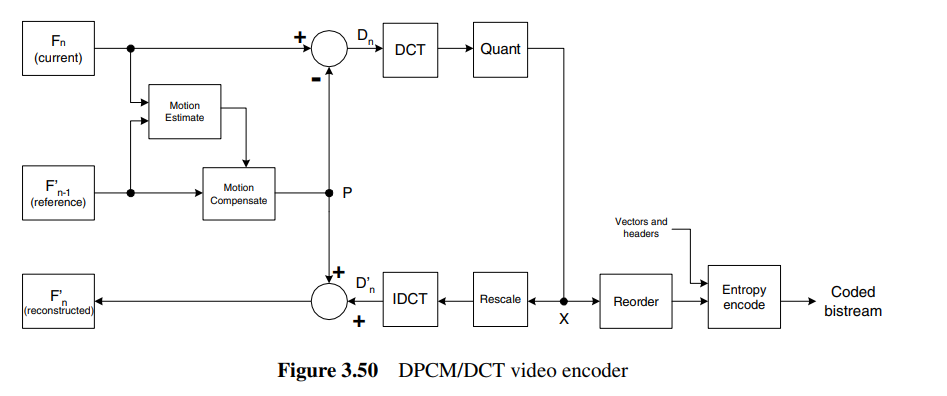

- 
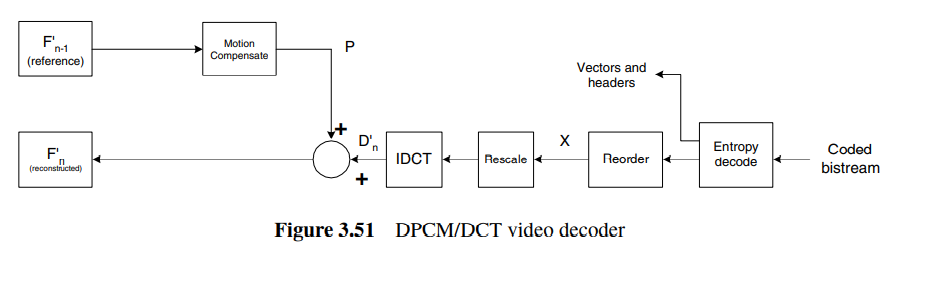

#### **1- The Low Compression:**

In [ ]:
#Each frame is represented by the 300 macroblock from AllMacroBlocksArray
Residual_AllMacroBlocksArray = AllMacroBlocksArray; #The predicted array of all predicted Macro Blocks
Predicted_MacroBlock = np.zeros([MacroblockRows,MacroblockCols]); #The Predicted Macro Block
Predicted_Index = 0; #Used in motion Vector
f = 0; #The Estimation Frame
AllMotionVectors = [];
n_Bits_after_encoding3 = 0;
ReferanceFrame = np.zeros([P,nofMacroblocks,MacroblockRows,MacroblockCols]);

ReferanceFrame[0,:,:,:] = AllMacroBlocksArray[0,:,:,:];


DecodedFramesP =  np.zeros([P,nofMacroblocks,MacroblockRows,MacroblockCols]); #Preparing one array for all decoded frames


for f1 in range(1,P):
  MotionVector = []; # The Motion Vector will be appended with each index of each block in the predicted frame

  ReconstructedFrame = np.zeros([nofMacroblocks,MacroblockRows,MacroblockCols]);

  DecodedImage = np.zeros([nofMacroblocks,MacroblockRows,MacroblockCols]); #Preparing the decoded image

  for n in range(nofMacroblocks): # n is the index of the Macro Block
 
    Next = n + 1 #The Next MacroBlock is at the index + 1
    Previous = n - 1 # The Previous MacroBlock is at the index - 1
    Down = n + 20 #The Down MacroBlock is at the same column but shifted by one row below
    UP = n - 20; #The UP MacroBlock is at the same column but shifted by one row above

    #BUT!! We have some conditions on the edges of the Matrix!

    #The First Condition: For all MacroBlocks that aren't on the edges. All mof them must obe to all below conditions at the same time

    if Next > 0 and Next < 300 and Previous > 0 and  Previous < 300 and Down > 0 and Down < 300 and UP > 0 and UP < 300:

      #Calculating the SUM SQUARE ERROR of each neighbouring MacroBlock to get the MinimumErrormum (Best Match).

      Error_TheSameIndex = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,n,:,:]);  #If there's No Change!!
      Error_Next = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Next,:,:]); 
      Error_Previous = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Previous,:,:]);
      Error_Down = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Down,:,:]);
      Error_UP = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,UP,:,:]);

      MinimumError = min(Error_Next,Error_Previous,Error_Down,Error_UP,Error_TheSameIndex); #The Minimum Error

      #Getting the MacroBlock with the lowest error to be the Predicted MacroBlock, and its index will be appended to the Motion Vector
      if MinimumError == Error_TheSameIndex:
        Predicted_MacroBlock = ReferanceFrame[f1,n,:,:]
        Predicted_Index = n;
      
      if MinimumError == Error_Next:
        Predicted_MacroBlock = ReferanceFrame[f1,Next,:,:]
        Predicted_Index = Next;

      if MinimumError == Error_Previous:
        Predicted_MacroBlock = ReferanceFrame[f1,Previous,:,:]
        Predicted_Index = Previous;

      if MinimumError == Error_Down:
        Predicted_MacroBlock = ReferanceFrame[f1,Down,:,:];
        Predicted_Index = Down;

      if MinimumError == Error_UP:
        Predicted_MacroBlock = ReferanceFrame[f1,UP,:,:];
        Predicted_Index = UP;

    #The secnd Condtion is at the The MacroBlock of index (0,0)

    elif  n==0: #0,0
    
    # The possible neighbouring MacroBlocks are the Next, and Down One.
      Error_Next = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Next,:,:]);
      Error_Down = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Down,:,:]);
      Error_TheSameIndex = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,n,:,:]);  #If there's No Change!!
      MinimumError = min(Error_Next,Error_Down,Error_TheSameIndex);

      if MinimumError == Error_TheSameIndex:
        Predicted_MacroBlock = ReferanceFrame[f1,n,:,:]
        Predicted_Index = n;

      if MinimumError == Error_Next:
        Predicted_MacroBlock = ReferanceFrame[f1,Next,:,:];
        Predicted_Index = Next;

      if MinimumError == Error_Down:
        Predicted_MacroBlock = ReferanceFrame[f1,Down,:,:];
        Predicted_Index = Down;

    #The third Condtion is at the The MacroBlock of index (0,19)||Last one in the first row, and first one in the last column

    elif n==19: #0,19
      # The possible neighbouring MacroBlocks are the Previous, and Down One.

      Error_Previous = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Previous,:,:]);
      Error_Down = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Down,:,:]);
      Error_TheSameIndex = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,n,:,:]);  #If there's No Change!!
      MinimumError = min(Error_Previous,Error_Down,Error_TheSameIndex);

      if MinimumError == Error_TheSameIndex:
        Predicted_MacroBlock = ReferanceFrame[f1,n,:,:]
        Predicted_Index = n;

      if MinimumError == Error_Down:
        Predicted_MacroBlock =ReferanceFrame[f1,Down,:,:];
        Predicted_Index = Down;

      if MinimumError == Error_Previous:
        Predicted_MacroBlock = ReferanceFrame[f1,Previous,:,:];
        Predicted_Index = Previous;

    #The third Condtion is at the The MacroBlock of index (14,0)||Last one in the first column, and first one in the last row


    elif n == 280: #14,0
        # The possible neighbouring MacroBlocks are the Next, and UP One.

      Error_Next = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Next,:,:]);
      Error_UP = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,UP,:,:]);
      Error_TheSameIndex = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,n,:,:]);  #If there's No Change!!
      MinimumError = min(Error_Next,Error_UP,Error_TheSameIndex);

      if MinimumError == Error_TheSameIndex:
        Predicted_MacroBlock = ReferanceFrame[f1,n,:,:]
        Predicted_Index = n;

      if MinimumError == Error_Next:
        Predicted_MacroBlock = ReferanceFrame[f1,Next,:,:]
        Predicted_Index = Next;

      if MinimumError == Error_UP:
        Predicted_MacroBlock = ReferanceFrame[f1,UP,:,:];
        Predicted_Index = UP;

    #The forth Condtion is at the The MacroBlock of index (14,19)||Last one in the last column, and first one in the last row

    elif n == 299: #14,19
        # The possible neighbouring MacroBlocks are the Previous, and UP One.

      Error_Previous = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Previous,:,:]);
      Error_UP = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,UP,:,:]);
      Error_TheSameIndex = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,n,:,:]);  #If there's No Change!!
      MinimumError = min(Error_Previous,Error_UP,Error_TheSameIndex);

      if MinimumError == Error_TheSameIndex:
        Predicted_MacroBlock = ReferanceFrame[f1,n,:,:]
        Predicted_Index = n;

      if MinimumError == Error_Previous:
        Predicted_MacroBlock = ReferanceFrame[f1,Previous,:,:]
        Predicted_Index = Previous;

      if MinimumError == Error_UP:
        Predicted_MacroBlock = ReferanceFrame[f1,UP,:,:];
        Predicted_Index = UP;

    #The fifth Condtion is at the all MacroBlocks at the first row

    elif n < 19: #first row
        # The possible neighbouring MacroBlocks are the Previous, and Down, and Next One.

      Error_Next = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Next,:,:]);
      Error_Previous = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Previous,:,:]);
      Error_Down = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Down,:,:]);
      Error_TheSameIndex = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,n,:,:]);  #If there's No Change!!
      MinimumError = min(Error_Next,Error_Previous,Error_Down,Error_TheSameIndex);

      if MinimumError == Error_TheSameIndex:
        Predicted_MacroBlock = ReferanceFrame[f1,n,:,:]
        Predicted_Index = n;

      if MinimumError == Error_Next:
        Predicted_MacroBlock = ReferanceFrame[f1,Next,:,:]
        Predicted_Index = Next;

      if MinimumError == Error_Previous:
        Predicted_MacroBlock = ReferanceFrame[f1,Previous,:,:]
        Predicted_Index = Previous;

      if MinimumError == Error_Down:
        Predicted_MacroBlock = ReferanceFrame[f1,Down,:,:];
        Predicted_Index = Down;

    #The sixth Condtion is at the all MacroBlocks at the last row

    elif n < 300 and n > 279: #last row:
        # The possible neighbouring MacroBlocks are the Previous, and Up, and Next One.

      Error_Next = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Next,:,:]);
      Error_Previous = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Previous,:,:]);
      Error_UP = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,UP,:,:]);
      Error_TheSameIndex = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,n,:,:]);  #If there's No Change!!
      MinimumError = min(Error_Next,Error_Previous,Error_UP,Error_TheSameIndex);

      if MinimumError == Error_TheSameIndex:
        Predicted_MacroBlock = ReferanceFrame[f1,n,:,:]
        Predicted_Index = n;

      if MinimumError == Error_Next:
        Predicted_MacroBlock = ReferanceFrame[f1,Next,:,:]
        Predicted_Index = Next;

      if MinimumError == Error_Previous:
        Predicted_MacroBlock = ReferanceFrame[f1,Previous,:,:];
        Predicted_Index = Previous;

      if MinimumError == Error_UP:
        Predicted_MacroBlock = ReferanceFrame[f1,UP,:,:];
        Predicted_Index = UP;

    #The seventh Condtion is at the all MacroBlocks at the first Column

    elif n % 20 == 0: #first col
        # The possible neighbouring MacroBlocks are the UP, and Down, and Next One.

      Error_Next = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Next,:,:]);
      Error_Down = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Down,:,:]);
      Error_UP = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,UP,:,:]);
      Error_TheSameIndex = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,n,:,:]);  #If there's No Change!!
      MinimumError = min(Error_Next,Error_Down,Error_UP,Error_TheSameIndex);

      if MinimumError == Error_TheSameIndex:
        Predicted_MacroBlock = ReferanceFrame[f1,n,:,:]
        Predicted_Index = n;

      if min == Error_Next:
        Predicted_MacroBlock = ReferanceFrame[f1,Next,:,:];
        Predicted_Index = Next;

      if MinimumError == Error_Down:
        Predicted_MacroBlock = ReferanceFrame[f1,Down,:,:];
        Predicted_Index = Down;

      if MinimumError == Error_UP:
        Predicted_MacroBlock = ReferanceFrame[f1,UP,:,:]
        Predicted_Index = UP;

    #The eighth Condtion is at the all MacroBlocks at the last Column

    elif (n+1) % 20 == 0: #last col
      # The possible neighbouring MacroBlocks are the Previous, and Down, and UP One.

      Error_Previous = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Previous,:,:]);
      Error_Down = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Down,:,:]);
      Error_UP = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,UP,:,:]);
      Error_TheSameIndex = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,n,:,:]);  #If there's No Change!!
      MinimumError = min(Error_Previous,Error_Down,Error_UP,Error_TheSameIndex);

      if MinimumError == Error_TheSameIndex:
        Predicted_MacroBlock = ReferanceFrame[f1,n,:,:]
        Predicted_Index = n;

      if min == Error_Previous:
        Predicted_MacroBlock = ReferanceFrame[f1,Previous,:,:];
        Predicted_Index = Previous;

      if MinimumError == Error_Down:
        Predicted_MacroBlock = ReferanceFrame[f1,Down,:,:];
        Predicted_Index = Down;

      if MinimumError == Error_UP:
        Predicted_MacroBlock = ReferanceFrame[f1,UP,:,:];
        Predicted_Index = UP;

    #Updating the Predicted Macro Blocks Array and the Motion Vector
    Residual_AllMacroBlocksArray[f1,n,:,:] = AllMacroBlocksArray[f,n,:,:] - Predicted_MacroBlock;

    ''' DCT Transforming, quantizing, reordering, run length coding of the estimated residuals 
           from the motion compensation block. The IDCT and rescaling in the encoder is also
           implemented. '''

    ###########################################################################################
    RescaledBlockIDCT = np.zeros([16,16]);

    RescaledBlock = np.zeros([16,16]);

    DecodedMacroBlock = np.zeros([16,16]);

    for i in range(0,16,8):

      for u in range(0,16,8):

        Block8 = Residual_AllMacroBlocksArray[f1,n,i:i+8,u:u+8] # Dividing each macrobloack  into blocks 8*8 pixels 

        BlockDCT = Block8_DCT(Block8) # Performing DCT on each block  

        QuantizedBlock_ = np.divide(BlockDCT, QuantizationTable(1)) #Performing the quantization step per 8x8 block using a quantization table 1

        QuantizedBlock = QuantizedBlock_.round() #Rounding the Quantized Block

        OneDBlock = Zigzag(QuantizedBlock,8,8)      # Converting the 2-D Block into 1-D vector using the Zigzag Function                  

        RunLengthCode = run_length_encoder((OneDBlock))      # Using Run Length coding                                          
        
        # Huffman function
        FinalList = [item for sublist in RunLengthCode for item in sublist] #############Getting all lists (List of run length code for each block) in on list

        FinalEncodingCode, the_tree = HuffmanEncoding(FinalList);

        n_Bits_after_encoding3 = n_Bits_after_encoding3 + len(FinalEncodingCode); # To calculate the compression ratio.
        
        ''' Each quantised macroblock X is rescaled and inverse transformed to produce a decoded
            residual D_.
            Note that the nonreversible quantisation process means that D is not identical
            to D (i.e. distortion has been introduced)'''

        RescaledBlock[i:i+8,u:u+8] = np.multiply(QuantizedBlock, QuantizationTable(1));

        RescaledBlockIDCT[i:i+8,u:u+8] = Block8_IDCT(RescaledBlock);
        #####################################################################################################################################################################################################
        # DEcoder
        Decoding_Code = HuffmanDecoding(FinalEncodingCode, the_tree)      #  Huffman decoder function

        DecodedRunLengthCode = run_length_decoder((Decoding_Code))      #  Perform run-length decoding

        DecodedBlock8 = Inv_zigzag(DecodedRunLengthCode)      # Transforming the 1-D vector into 8x8 block
      
        DequantizedBlock = np.multiply(DecodedBlock8,QuantizationTable(1))      # Multiplying each block by the quantization tables

        IDCT_matrix = Block8_IDCT(DequantizedBlock)      # Performing IDCT

        DecodedMacroBlock[i:i+8,u:u+8] = IDCT_matrix; #Finally!!! The decoded Image

    ########################################################################################### 
    DecodedImage[n,:,:] = DecodedMacroBlock; #Collecting All Decoded MacroBlocks in one iamge frame.
    
    ReconstructedBlock = RescaledBlockIDCT + Predicted_MacroBlock; # The Reconstructed Macro Block afterIDCT Scaling.

    ReconstructedFrame[n,:,:] = ReconstructedBlock; #Collecting All Reconstructed MacroBlocks in one iamge frame. 

    MotionVector.append(Predicted_Index); #Appending The chosen index for the best match macroblock into the Motion Vector

    ###########################################################################################
  
  f = f + 1; #The index of The source macroblocks array, f1 is the index of the referance frames

  ReferanceFrame[f1,:,:,:] = ReconstructedFrame; #The referance frames is the Reconstructed Frames from the previous frames.

  DecodedFramesP[f1,:,:,:] = DecodedImage; #Collecting all decoded frames in one numpy Array

  AllMotionVectors.append(MotionVector)  #Appending The Motion Vector of each frame into one list

###**Retriving the Decoded Video:**

#### **Encodeing and Decoding the Motion Vectors**

In [ ]:
AllMotionVectorsArray = np.array(AllMotionVectors);
AllMotionVectorsList = [item for sublist in AllMotionVectors for item in sublist] # Getting all lists (List of run length code for each block) in one list
MotionCode, the_tree_ = HuffmanEncoding(AllMotionVectorsList);
DecodingMotion_Code = HuffmanDecoding(MotionCode, the_tree_)      #  Huffman decoder function

#### **Reconstructing the Frames**

In [ ]:
Rceived_VideoArray  = np.zeros([P,nofMacroblocks,16,16]);
Rceived_VideoArray [0,:,:,:] = AllMacroBlocksArray[0,:,:,:];
for Frame in range(1,P):
  Rceived_VideoArray [Frame,:,:,:] = DecodedFramesP[Frame-1,:,:,:] + ReferanceFrame[Frame,DecodingMotion_CodeArray[Frame-1,:],:,:]

In [ ]:
DecodedVideo = np.zeros([P,Rows,Cols])
for F in range(P):
  h = 0;
  for i in range(0,Rows,16):
      for u in range(0,Cols,16):
        DecodedVideo[F,i:i+16,u:u+16] = Rceived_VideoArray[F,h,:,:];
        h = h +1; 

#### **Displaying the Video**

In [ ]:
HTML(display_video(DecodedVideo).to_html5_video())

#### **The Compression Ratio:**

In [ ]:
CR3 = (I*Rows*Cols*8)/n_Bits_after_encoding3;
CR3

4.587351185476375

### **1- The High Compression:**

In [ ]:
#Each frame is represented by the 300 macroblock from AllMacroBlocksArray
Residual_AllMacroBlocksArray = AllMacroBlocksArray; #The predicted array of all predicted Macro Blocks
Predicted_MacroBlock = np.zeros([MacroblockRows,MacroblockCols]); #The Predicted Macro Block
Predicted_Index = 0; #Used in motion Vector
f = 0; #The Estimation Frame
AllMotionVectors = [];
n_Bits_after_encoding4 = 0;
ReferanceFrame = np.zeros([P,nofMacroblocks,MacroblockRows,MacroblockCols]);

ReferanceFrame[0,:,:,:] = AllMacroBlocksArray[0,:,:,:];


DecodedFramesP =  np.zeros([P,nofMacroblocks,MacroblockRows,MacroblockCols]); #Preparing one array for all decoded frames


for f1 in range(1,P):
  MotionVector = []; # The Motion Vector will be appended with each index of each block in the predicted frame

  ReconstructedFrame = np.zeros([nofMacroblocks,MacroblockRows,MacroblockCols]);

  DecodedImage = np.zeros([nofMacroblocks,MacroblockRows,MacroblockCols]); #Preparing the decoded image

  for n in range(nofMacroblocks): # n is the index of the Macro Block
 
    Next = n + 1 #The Next MacroBlock is at the index + 1
    Previous = n - 1 # The Previous MacroBlock is at the index - 1
    Down = n + 20 #The Down MacroBlock is at the same column but shifted by one row below
    UP = n - 20; #The UP MacroBlock is at the same column but shifted by one row above

    #BUT!! We have some conditions on the edges of the Matrix!

    #The First Condition: For all MacroBlocks that aren't on the edges. All mof them must obe to all below conditions at the same time

    if Next > 0 and Next < 300 and Previous > 0 and  Previous < 300 and Down > 0 and Down < 300 and UP > 0 and UP < 300:

      #Calculating the SUM SQUARE ERROR of each neighbouring MacroBlock to get the MinimumErrormum (Best Match).

      Error_TheSameIndex = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,n,:,:]);  #If there's No Change!!
      Error_Next = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Next,:,:]); 
      Error_Previous = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Previous,:,:]);
      Error_Down = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Down,:,:]);
      Error_UP = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,UP,:,:]);

      MinimumError = min(Error_Next,Error_Previous,Error_Down,Error_UP,Error_TheSameIndex); #The Minimum Error

      #Getting the MacroBlock with the lowest error to be the Predicted MacroBlock, and its index will be appended to the Motion Vector
      if MinimumError == Error_TheSameIndex:
        Predicted_MacroBlock = ReferanceFrame[f1,n,:,:]
        Predicted_Index = n;
      
      if MinimumError == Error_Next:
        Predicted_MacroBlock = ReferanceFrame[f1,Next,:,:]
        Predicted_Index = Next;

      if MinimumError == Error_Previous:
        Predicted_MacroBlock = ReferanceFrame[f1,Previous,:,:]
        Predicted_Index = Previous;

      if MinimumError == Error_Down:
        Predicted_MacroBlock = ReferanceFrame[f1,Down,:,:];
        Predicted_Index = Down;

      if MinimumError == Error_UP:
        Predicted_MacroBlock = ReferanceFrame[f1,UP,:,:];
        Predicted_Index = UP;

    #The secnd Condtion is at the The MacroBlock of index (0,0)

    elif  n==0: #0,0
    
    # The possible neighbouring MacroBlocks are the Next, and Down One.
      Error_Next = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Next,:,:]);
      Error_Down = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Down,:,:]);
      Error_TheSameIndex = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,n,:,:]);  #If there's No Change!!
      MinimumError = min(Error_Next,Error_Down,Error_TheSameIndex);

      if MinimumError == Error_TheSameIndex:
        Predicted_MacroBlock = ReferanceFrame[f1,n,:,:]
        Predicted_Index = n;

      if MinimumError == Error_Next:
        Predicted_MacroBlock = ReferanceFrame[f1,Next,:,:];
        Predicted_Index = Next;

      if MinimumError == Error_Down:
        Predicted_MacroBlock = ReferanceFrame[f1,Down,:,:];
        Predicted_Index = Down;

    #The third Condtion is at the The MacroBlock of index (0,19)||Last one in the first row, and first one in the last column

    elif n==19: #0,19
      # The possible neighbouring MacroBlocks are the Previous, and Down One.

      Error_Previous = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Previous,:,:]);
      Error_Down = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Down,:,:]);
      Error_TheSameIndex = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,n,:,:]);  #If there's No Change!!
      MinimumError = min(Error_Previous,Error_Down,Error_TheSameIndex);

      if MinimumError == Error_TheSameIndex:
        Predicted_MacroBlock = ReferanceFrame[f1,n,:,:]
        Predicted_Index = n;

      if MinimumError == Error_Down:
        Predicted_MacroBlock =ReferanceFrame[f1,Down,:,:];
        Predicted_Index = Down;

      if MinimumError == Error_Previous:
        Predicted_MacroBlock = ReferanceFrame[f1,Previous,:,:];
        Predicted_Index = Previous;

    #The third Condtion is at the The MacroBlock of index (14,0)||Last one in the first column, and first one in the last row


    elif n == 280: #14,0
        # The possible neighbouring MacroBlocks are the Next, and UP One.

      Error_Next = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Next,:,:]);
      Error_UP = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,UP,:,:]);
      Error_TheSameIndex = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,n,:,:]);  #If there's No Change!!
      MinimumError = min(Error_Next,Error_UP,Error_TheSameIndex);

      if MinimumError == Error_TheSameIndex:
        Predicted_MacroBlock = ReferanceFrame[f1,n,:,:]
        Predicted_Index = n;

      if MinimumError == Error_Next:
        Predicted_MacroBlock = ReferanceFrame[f1,Next,:,:]
        Predicted_Index = Next;

      if MinimumError == Error_UP:
        Predicted_MacroBlock = ReferanceFrame[f1,UP,:,:];
        Predicted_Index = UP;

    #The forth Condtion is at the The MacroBlock of index (14,19)||Last one in the last column, and first one in the last row

    elif n == 299: #14,19
        # The possible neighbouring MacroBlocks are the Previous, and UP One.

      Error_Previous = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Previous,:,:]);
      Error_UP = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,UP,:,:]);
      Error_TheSameIndex = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,n,:,:]);  #If there's No Change!!
      MinimumError = min(Error_Previous,Error_UP,Error_TheSameIndex);

      if MinimumError == Error_TheSameIndex:
        Predicted_MacroBlock = ReferanceFrame[f1,n,:,:]
        Predicted_Index = n;

      if MinimumError == Error_Previous:
        Predicted_MacroBlock = ReferanceFrame[f1,Previous,:,:]
        Predicted_Index = Previous;

      if MinimumError == Error_UP:
        Predicted_MacroBlock = ReferanceFrame[f1,UP,:,:];
        Predicted_Index = UP;

    #The fifth Condtion is at the all MacroBlocks at the first row

    elif n < 19: #first row
        # The possible neighbouring MacroBlocks are the Previous, and Down, and Next One.

      Error_Next = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Next,:,:]);
      Error_Previous = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Previous,:,:]);
      Error_Down = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Down,:,:]);
      Error_TheSameIndex = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,n,:,:]);  #If there's No Change!!
      MinimumError = min(Error_Next,Error_Previous,Error_Down,Error_TheSameIndex);

      if MinimumError == Error_TheSameIndex:
        Predicted_MacroBlock = ReferanceFrame[f1,n,:,:]
        Predicted_Index = n;

      if MinimumError == Error_Next:
        Predicted_MacroBlock = ReferanceFrame[f1,Next,:,:]
        Predicted_Index = Next;

      if MinimumError == Error_Previous:
        Predicted_MacroBlock = ReferanceFrame[f1,Previous,:,:]
        Predicted_Index = Previous;

      if MinimumError == Error_Down:
        Predicted_MacroBlock = ReferanceFrame[f1,Down,:,:];
        Predicted_Index = Down;

    #The sixth Condtion is at the all MacroBlocks at the last row

    elif n < 300 and n > 279: #last row:
        # The possible neighbouring MacroBlocks are the Previous, and Up, and Next One.

      Error_Next = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Next,:,:]);
      Error_Previous = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Previous,:,:]);
      Error_UP = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,UP,:,:]);
      Error_TheSameIndex = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,n,:,:]);  #If there's No Change!!
      MinimumError = min(Error_Next,Error_Previous,Error_UP,Error_TheSameIndex);

      if MinimumError == Error_TheSameIndex:
        Predicted_MacroBlock = ReferanceFrame[f1,n,:,:]
        Predicted_Index = n;

      if MinimumError == Error_Next:
        Predicted_MacroBlock = ReferanceFrame[f1,Next,:,:]
        Predicted_Index = Next;

      if MinimumError == Error_Previous:
        Predicted_MacroBlock = ReferanceFrame[f1,Previous,:,:];
        Predicted_Index = Previous;

      if MinimumError == Error_UP:
        Predicted_MacroBlock = ReferanceFrame[f1,UP,:,:];
        Predicted_Index = UP;

    #The seventh Condtion is at the all MacroBlocks at the first Column

    elif n % 20 == 0: #first col
        # The possible neighbouring MacroBlocks are the UP, and Down, and Next One.

      Error_Next = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Next,:,:]);
      Error_Down = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Down,:,:]);
      Error_UP = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,UP,:,:]);
      Error_TheSameIndex = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,n,:,:]);  #If there's No Change!!
      MinimumError = min(Error_Next,Error_Down,Error_UP,Error_TheSameIndex);

      if MinimumError == Error_TheSameIndex:
        Predicted_MacroBlock = ReferanceFrame[f1,n,:,:]
        Predicted_Index = n;

      if min == Error_Next:
        Predicted_MacroBlock = ReferanceFrame[f1,Next,:,:];
        Predicted_Index = Next;

      if MinimumError == Error_Down:
        Predicted_MacroBlock = ReferanceFrame[f1,Down,:,:];
        Predicted_Index = Down;

      if MinimumError == Error_UP:
        Predicted_MacroBlock = ReferanceFrame[f1,UP,:,:]
        Predicted_Index = UP;

    #The eighth Condtion is at the all MacroBlocks at the last Column

    elif (n+1) % 20 == 0: #last col
      # The possible neighbouring MacroBlocks are the Previous, and Down, and UP One.

      Error_Previous = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Previous,:,:]);
      Error_Down = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,Down,:,:]);
      Error_UP = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,UP,:,:]);
      Error_TheSameIndex = LSE(AllMacroBlocksArray[f,n,:,:],ReferanceFrame[f1,n,:,:]);  #If there's No Change!!
      MinimumError = min(Error_Previous,Error_Down,Error_UP,Error_TheSameIndex);

      if MinimumError == Error_TheSameIndex:
        Predicted_MacroBlock = ReferanceFrame[f1,n,:,:]
        Predicted_Index = n;

      if min == Error_Previous:
        Predicted_MacroBlock = ReferanceFrame[f1,Previous,:,:];
        Predicted_Index = Previous;

      if MinimumError == Error_Down:
        Predicted_MacroBlock = ReferanceFrame[f1,Down,:,:];
        Predicted_Index = Down;

      if MinimumError == Error_UP:
        Predicted_MacroBlock = ReferanceFrame[f1,UP,:,:];
        Predicted_Index = UP;

    #Updating the Predicted Macro Blocks Array and the Motion Vector
    Residual_AllMacroBlocksArray[f1,n,:,:] = AllMacroBlocksArray[f,n,:,:] - Predicted_MacroBlock;

    ''' DCT Transforming, quantizing, reordering, run length coding of the estimated residuals 
           from the motion compensation block. The IDCT and rescaling in the encoder is also
           implemented. '''

    ###########################################################################################
    RescaledBlockIDCT = np.zeros([16,16]);

    RescaledBlock = np.zeros([16,16]);

    DecodedMacroBlock = np.zeros([16,16]);

    for i in range(0,16,8):

      for u in range(0,16,8):

        Block8 = Residual_AllMacroBlocksArray[f1,n,i:i+8,u:u+8] # Dividing each macrobloack  into blocks 8*8 pixels 

        BlockDCT = Block8_DCT(Block8) # Performing DCT on each block  

        QuantizedBlock_ = np.divide(BlockDCT, QuantizationTable(2)) #Performing the quantization step per 8x8 block using a quantization table 1

        QuantizedBlock = QuantizedBlock_.round() #Rounding the Quantized Block

        OneDBlock = Zigzag(QuantizedBlock,8,8)      # Converting the 2-D Block into 1-D vector using the Zigzag Function                  

        RunLengthCode = run_length_encoder((OneDBlock))      # Using Run Length coding                                          
        
        # Huffman function
        FinalList = [item for sublist in RunLengthCode for item in sublist] #############Getting all lists (List of run length code for each block) in on list

        FinalEncodingCode, the_tree = HuffmanEncoding(FinalList);

        n_Bits_after_encoding4 = n_Bits_after_encoding4 + len(FinalEncodingCode); # To calculate the compression ratio.
        
        ''' Each quantised macroblock X is rescaled and inverse transformed to produce a decoded
            residual D_.
            Note that the nonreversible quantisation process means that D is not identical
            to D (i.e. distortion has been introduced)'''

        RescaledBlock[i:i+8,u:u+8] = np.multiply(QuantizedBlock, QuantizationTable(2));

        RescaledBlockIDCT[i:i+8,u:u+8] = Block8_IDCT(RescaledBlock);
        #####################################################################################################################################################################################################
        # DEcoder
        Decoding_Code = HuffmanDecoding(FinalEncodingCode, the_tree)      #  Huffman decoder function

        DecodedRunLengthCode = run_length_decoder((Decoding_Code))      #  Perform run-length decoding

        DecodedBlock8 = Inv_zigzag(DecodedRunLengthCode)      # Transforming the 1-D vector into 8x8 block
      
        DequantizedBlock = np.multiply(DecodedBlock8,QuantizationTable(2))      # Multiplying each block by the quantization tables

        IDCT_matrix = Block8_IDCT(DequantizedBlock)      # Performing IDCT

        DecodedMacroBlock[i:i+8,u:u+8] = IDCT_matrix; #Finally!!! The decoded Image

    ########################################################################################### 
    DecodedImage[n,:,:] = DecodedMacroBlock; #Collecting All Decoded MacroBlocks in one iamge frame.
    
    ReconstructedBlock = RescaledBlockIDCT + Predicted_MacroBlock; # The Reconstructed Macro Block afterIDCT Scaling.

    ReconstructedFrame[n,:,:] = ReconstructedBlock; #Collecting All Reconstructed MacroBlocks in one iamge frame. 

    MotionVector.append(Predicted_Index); #Appending The chosen index for the best match macroblock into the Motion Vector

    ###########################################################################################
  
  f = f + 1; #The index of The source macroblocks array, f1 is the index of the referance frames

  ReferanceFrame[f1,:,:,:] = ReconstructedFrame; #The referance frames is the Reconstructed Frames from the previous frames.

  DecodedFramesP[f1,:,:,:] = DecodedImage; #Collecting all decoded frames in one numpy Array

  AllMotionVectors.append(MotionVector)  #Appending The Motion Vector of each frame into one list

###**Retriving the Decoded Video:**

#### **Encodeing and Decoding the Motion Vectors**

In [ ]:
AllMotionVectorsArray = np.array(AllMotionVectors);
AllMotionVectorsList = [item for sublist in AllMotionVectors for item in sublist] # Getting all lists (List of run length code for each block) in one list
MotionCode, the_tree_ = HuffmanEncoding(AllMotionVectorsList);
DecodingMotion_Code = HuffmanDecoding(MotionCode, the_tree_)      #  Huffman decoder function

#### **Reconstructing the Frames**

In [ ]:
Rceived_VideoArray  = np.zeros([P,nofMacroblocks,16,16]);
Rceived_VideoArray [0,:,:,:] = AllMacroBlocksArray[0,:,:,:];
for Frame in range(1,P):
  Rceived_VideoArray [Frame,:,:,:] = DecodedFramesP[Frame-1,:,:,:] + ReferanceFrame[Frame,DecodingMotion_CodeArray[Frame-1,:],:,:]

In [ ]:
DecodedVideo = np.zeros([P,Rows,Cols])
for F in range(P):
  h = 0;
  for i in range(0,Rows,16):
      for u in range(0,Cols,16):
        DecodedVideo[F,i:i+16,u:u+16] = Rceived_VideoArray[F,h,:,:];
        h = h +1; 

#### **Displaying the Video:**

In [ ]:
HTML(display_video(DecodedVideo).to_html5_video())

###**The Compression Ratio:**

In [ ]:
CR4 = (I*Rows*Cols*8)/n_Bits_after_encoding4;
CR4

14.848649628421244

**The Compression Ratio for the Low Compressed Video is 4.1 for the Lossless Compression (JEPG), and 4.5 for the LOSSY Compression**
<br> <br>
**The Compression Ratio for the High Compressed Video is 13.1 for the Lossless Compression (JEPG), and 14.8 for the LOSSY Compression**
